# __Some basic Panda manipulations and visualizations.__

## 1. We've all got to start somewhere.

### Hey. After having read that the best way to consolidate learning is to write about it I thought I'd do exactly that. I am going to start typing up things I have been learning about. So this blog is going to be a place I dump posts and projects I have been working on, like a scrapbook. I'm also bored in quarantine.

Pandas is a very powerful library in Python that provides easy to use data structures and tools for data analysis. I'm going to play around with some Panda functions and combine them with some matplotlib tools. Matplotlib is a library used for data visualisation; plots, graphs etc. These two libraries combined are foundations for data analysis in Python and are important to have a good grasp on before progressing onto the tougher, more complex but not always more useful tools. 
<br>
<br>
https://pandas.pydata.org/pandas-docs/stable/index.html
<br>
https://matplotlib.org/contents.html
<br>
<br>
I am going to be playing around on an export of my goodreads profile, a small dataset of round 100 rows. All books I have read since the inception of my account in 2015. Once I read a book it is uploaded to my Goodreads.

In [2]:
#Here I am importing packages and libraries. Matplotlib and Pandas being two of them. Using as makes them easier to call later on.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
print ("packages imported")

packages imported


The first thing I wanted to do was to load in and take a look at my data:

In [50]:
#getting my dataset pathfile
path = "C:/Users/Jamie/Desktop/Python/goodreads_library_export.csv"

#reading in the data to a dataframe using a pandas function 
df = pd.read_csv(path)

#seeing the top 2 rows to check it has imported correctly
df.head(3)

,Book Id,Genre,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,31423133,Self-help,Make Your Bed: Little Things That Can Change Y...,William H. McRaven,"McRaven, William H.",NaN,NaN,NaN,4,3.99,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,19148978,Classic,England Your England,George Orwell,"Orwell, George",T.R. Fyvel,NaN,NaN,4,3.94,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,38116896,Classic,Notes on Nationalism,George Orwell,"Orwell, George",NaN,NaN,NaN,3,4.05,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


The dataset contains interesting info such as the average rating of the book, the form I read it in, the genre and the year published. But it also contains a bunch of useless information like owned copies, I typically own just one copy of a book, doesnt everyone? 
<br>
Because of the irrelevance of some columns I to created a new a dataframe with interesting data, df1.

In [6]:
#Selecting the columns from the original df I wanted to use in new dataframe
df1 = pd.DataFrame(df, columns=['Genre', 'Title', 'Author', 'Average Rating', 'Binding', 'Number of Pages', 'Year Published', 'Date Added'])

#Here I was formatting the data in the Genre column to Title format, looks smarter
df1['Genre'] = df1['Genre'].str.title()

df1.head(3)  

,Genre,Title,Author,Average Rating,Binding,Number of Pages,Year Published,Date Added
0,Self-Help,Make Your Bed: Little Things That Can Change Y...,William H. McRaven,3.99,Audiobook,144,2017.0,11/27/2020
1,Classic,England Your England,George Orwell,3.94,Kindle Edition,36,1941.0,12/6/2020
2,Classic,Notes on Nationalism,George Orwell,4.05,Kindle Edition,56,2018.0,6/1/2020


Ok cool, the useful data is in a workable dataframe so now I can start taking a look at it. 
<br>

Let's say I wanted to find out how many books I have read in different formats, be it Kindle, paperback etc. The value_counts() will be useful for this.

In [7]:
#Selecting the column name and doing a count of the values in that column.
df_format = df1['Binding'].value_counts()
df_format

Kindle Edition           37
Paperback                30
Hardcover                26
ebook                     4
Mass Market Paperback     1
Audiobook                 1
Name: Binding, dtype: int64

Not suprisingly I have read the most books on my kindle. Useful to anyone? No. Interesting to me? little bit. 
<br>
Next I want to see the average rating and book length of the books I have read. The .mean() will do the job. I also rounded them to make more sense. I converted the number of pages to an INT because reading a book with 295.36 pages sounds silly and the data type was a FLOAT.

In [54]:
#Selecting the column and finding the mean and rounding.
df_length = df1['Number of Pages'].mean().astype(int)
df_rating = df1['Average Rating'].mean().round(2)

#printing the results
print ("The average book length is:", df_length, "and the average Goodreads rating is:", df_rating)

The average book length is: 295 and the average Goodreads rating is: 4.1


The next thing I want to find out is the year I have read the most books. A book is added to my goodreads account once I read it so the 'Date Added' column is the best measure for when I have read something. To make things easier I have decided to extract the year from that date using the .datetimeindex function and adding that as a new column. This means that we can do a count on the number of books read each year. 

In [55]:
#defining df_year
df_year = df1['Year Added'].value_counts()

#Extracting the year from the data added column wihc had date in MM/DD/YYYY
df1['Year Added'] = pd.DatetimeIndex(df1['Date Added']).year

df_year

2020    28
2016    24
2019    15
2018    14
2017    11
2021     4
2015     4
Name: Year Added, dtype: int64

Interestingly the two years I read the most were the year I started college and the year I graduated. Not suprising as the time spent in college was spent reading textbooks instead. 
<br>

Now I want to find my most read genre. I also want to visualize my most read genre using Matplotlib. I will plot my categorical variables in a bar chart.

Text(0.5, 1.0, 'Frequency of books read by genre')

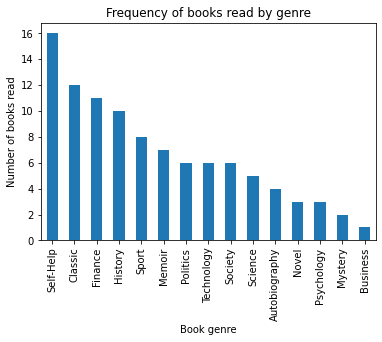

In [43]:
#find the value counts of my column Genre
df_genre = df1['Genre'].value_counts()

#plotting and labelling my chart. You can get very complex with charts and graphs but this is a simple form.
ax = df_genre.plot(kind = 'bar')
ax.set_xlabel("Book genre")
ax.set_ylabel("Number of books read")
ax.set_title("Frequency of books read by genre")

Interestingly I have read self-help books the most out of all genres followed by Classics. 
<br>

Next up, finding which month I read the most. Similar story as with the years. Extract the year, value_count() and plot. This time there I added a layer of complexity as I wanted to align my x-axis from Jan-Dec, instead of the month with the highest value down to the month with the lowest.

Text(0.5, 1.0, 'Frequency of books read by month')

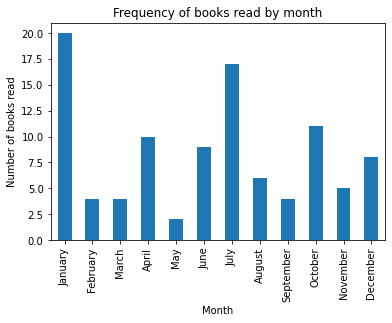

In [48]:
#defining df_month
df_month = df1['Month Added'].value_counts()

#extracting month
df1['Month Added'] = pd.DatetimeIndex(df1['Date Added']).month_name()

#ordering x-axis
df_month = df_month.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))

#plotting
ax = df_month.plot(kind = 'bar')
ax.set_xlabel("Month")
ax.set_ylabel("Number of books read")
ax.set_title("Frequency of books read by month")

Are the results: Interesting to me? yeah. Useful to anyone else? nah.
<br>
But looking at the distribution across the year its clear I read more when I'm not in college (January and July), which makes logical sense for the same reasons as noted before. I also am reading the least when it is finals (May).
I also think there is a spike in January because I often tell myself every year I want to read more books, and I therefore have a boost of motivation, which evidently drops off pretty kick.
<br>

I think I'll leave it there for this one. I will do a follow up with more detailed analysis including regression analysis and some more detailed graphing. If anyone ever reads this hope they found it semi-useful. Leave a comment if you did.